### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Afnan00-1/Machine-Learning-project--1/main/heart_disease.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.duplicated().sum()

18078

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [11]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [12]:
df['Diabetic'].value_counts()

Diabetic
No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: count, dtype: int64

In [13]:
df = df[df.columns].replace(
    {'Yes':1, 'No': 0, 'Male': 1, 'Female':0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)':1}
)

In [14]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [15]:
df['Diabetic'].value_counts()

Diabetic
0    258572
1     43145
Name: count, dtype: int64

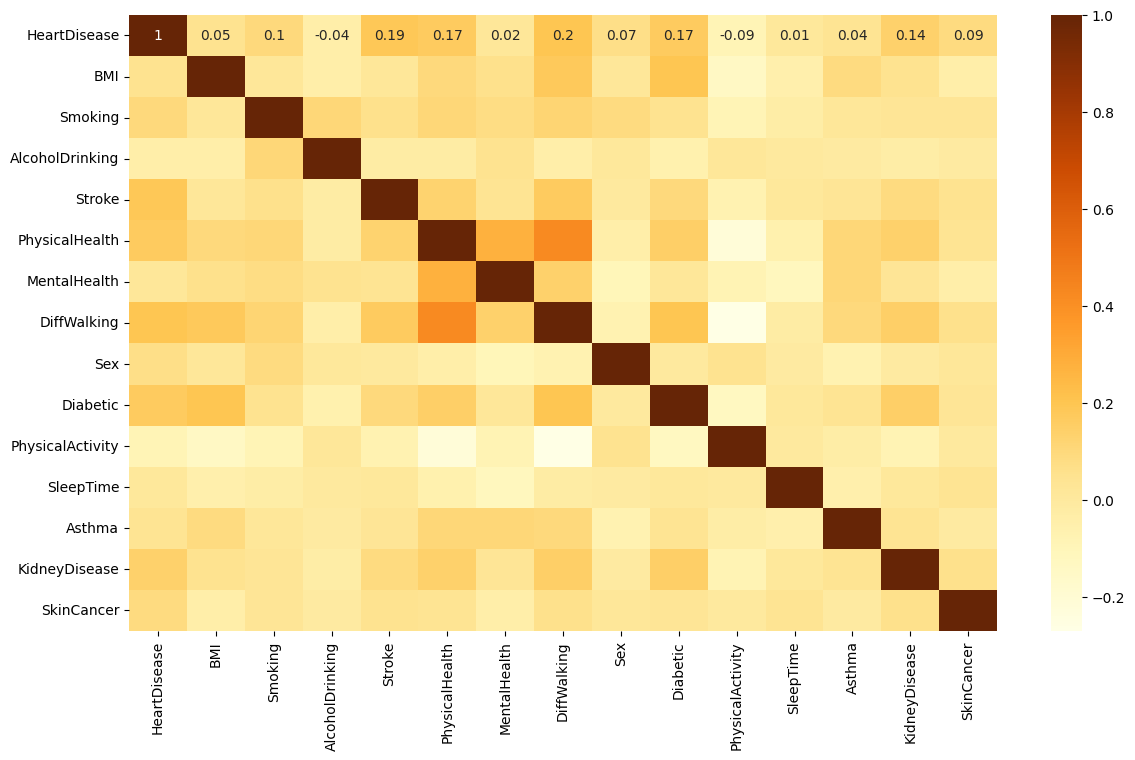

In [16]:
new_df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'])
corr = new_df.corr().round(2)

plt.figure(figsize = (14, 8))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')
plt.show()

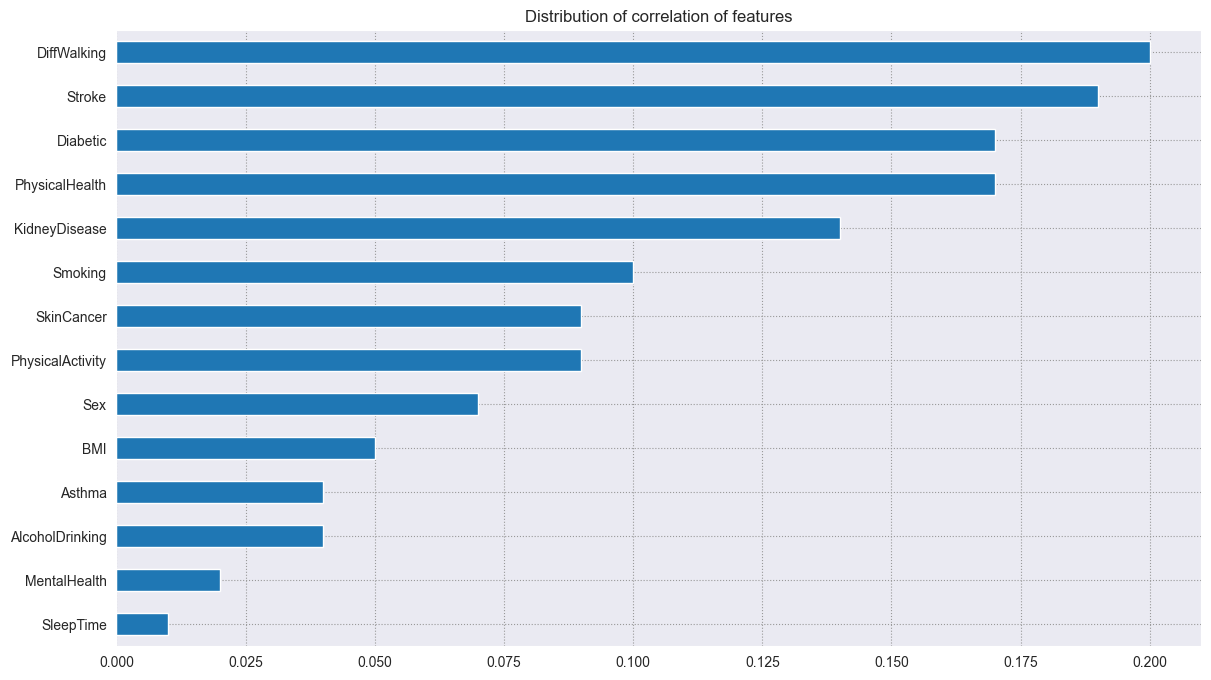

In [17]:
plt.figure(figsize = (14, 8))
plt.title('Distribution of correlation of features')
abs(corr['HeartDisease']).sort_values()[:-1].plot.barh()
plt.show()

### Training and Testing

In [18]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.25, random_state = 42)
print(f'Shape of Training Data: {X_train.shape}\nShape of testing data: {X_test.shape}\nShape of training class: {y_train.shape}\nShape of training label:{y_test.shape}')



Shape of Training Data: (226287, 17)
Shape of testing data: (75430, 17)
Shape of training class: (226287,)
Shape of training label:(75430,)


### Data Preprocessing

In [19]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [20]:
df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


# **Standardization Of Data**

In [21]:
scaling=StandardScaler()

In [22]:
X_train[['BMI','PhysicalHealth','MentalHealth','SleepTime']]=scaling.fit_transform(X_train[['BMI','PhysicalHealth','MentalHealth','SleepTime']])
X_test[['BMI','PhysicalHealth','MentalHealth','SleepTime']]=scaling.transform(X_test[['BMI','PhysicalHealth','MentalHealth','SleepTime']])


In [23]:
X_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
284798,1.105450,0,0,0,-0.439416,-0.261476,1,0,65-69,Black,0,1,Very good,0.624685,0,0,0
206219,-0.098285,0,0,0,-0.439416,-0.507458,0,1,75-79,Black,1,1,Good,0.624685,1,0,0
298442,-0.408876,0,0,0,-0.193732,-0.261476,0,0,50-54,White,0,1,Very good,0.624685,0,0,0
119751,1.550477,1,0,1,-0.316574,-0.384467,0,0,50-54,Black,1,1,Good,1.987560,0,0,0
103309,-0.172456,0,0,0,-0.439416,-0.261476,0,0,40-44,Black,0,1,Very good,0.624685,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77280,0.314292,0,0,0,-0.439416,-0.507458,0,0,55-59,White,0,0,Good,-0.056753,0,0,0
105364,1.627738,0,0,0,0.420478,-0.507458,0,0,35-39,Black,0,1,Fair,-0.738190,0,0,0
198456,-0.279077,0,0,0,-0.439416,2.075355,0,1,60-64,Hispanic,0,1,Fair,-0.738190,0,0,0
255102,-0.112192,1,0,0,-0.439416,-0.507458,0,1,65-69,White,0,1,Excellent,-0.738190,0,0,0


In [24]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [25]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['AgeCategory', 'Race', 'GenHealth']),
    remainder = 'passthrough'
)
# Transforming Train data
X_train_transformed = transformer.fit_transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = transformer.get_feature_names_out())

# Transforming test data
X_test_transfromed = transformer.transform(X_test)
X_test_transformed_df = pd.DataFrame(X_test_transfromed, columns = transformer.get_feature_names_out())

In [26]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
X_train_transformed_df

,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,onehotencoder__AgeCategory_45-49,onehotencoder__AgeCategory_50-54,onehotencoder__AgeCategory_55-59,onehotencoder__AgeCategory_60-64,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White,onehotencoder__GenHealth_Excellent,onehotencoder__GenHealth_Fair,onehotencoder__GenHealth_Good,onehotencoder__GenHealth_Poor,onehotencoder__GenHealth_Very good,remainder__BMI,remainder__Smoking,remainder__AlcoholDrinking,remainder__Stroke,remainder__PhysicalHealth,remainder__MentalHealth,remainder__DiffWalking,remainder__Sex,remainder__Diabetic,remainder__PhysicalActivity,remainder__SleepTime,remainder__Asthma,remainder__KidneyDisease,remainder__SkinCancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.376426,0.0,0.0,0.0,-0.439416,-0.384467,0.0,1.0,0.0,1.0,-0.056753,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.084378,1.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,1.0,0.624685,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.651242,0.0,0.0,0.0,-0.193732,0.722453,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.240211,0.0,0.0,0.0,-0.193732,-0.261476,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.038021,0.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,0.0,1.306122,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.133825,0.0,0.0,0.0,-0.439416,-0.507458,0.0,0.0,1.0,0.0,-0.738190,0.0,0.0,0.0
226283,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.617247,1.0,0.0,0.0,-0.439416,2.567319,0.0,0.0,0.0,0.0,0.624685,1.0,0.0,0.0
226284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.014842,0.0,0.0,0.0,0.666162,1.952364,1.0,0.0,0.0,0.0,-0.738190,1.0,0.0,0.0
226285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.928074,1.0,0.0,0.0,0.174794,3.182275,1.0,0.0,1.0,1.0,-0.738190,1.0,0.0,0.0


In [27]:
X_train = pd.concat([X_train_transformed_df, X_train.reset_index(drop = True)], axis = 1)
X_test = pd.concat([X_test_transformed_df, X_test.reset_index(drop = True)], axis = 1)

In [28]:
X_train

,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,onehotencoder__AgeCategory_45-49,onehotencoder__AgeCategory_50-54,onehotencoder__AgeCategory_55-59,onehotencoder__AgeCategory_60-64,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White,onehotencoder__GenHealth_Excellent,onehotencoder__GenHealth_Fair,onehotencoder__GenHealth_Good,onehotencoder__GenHealth_Poor,onehotencoder__GenHealth_Very good,remainder__BMI,remainder__Smoking,remainder__AlcoholDrinking,remainder__Stroke,remainder__PhysicalHealth,remainder__MentalHealth,remainder__DiffWalking,remainder__Sex,remainder__Diabetic,remainder__PhysicalActivity,remainder__SleepTime,remainder__Asthma,remainder__KidneyDisease,remainder__SkinCancer,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.376426,0.0,0.0,0.0,-0.439416,-0.384467,0.0,1.0,0.0,1.0,-0.056753,0.0,0.0,0.0,-0.376426,0,0,0,-0.439416,-0.384467,0,1,75-79,White,0,1,Very good,-0.056753,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.084378,1.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,1.0,0.624685,0.0,0.0,0.0,-0.084378,1,0,0,-0.439416,-0.507458,0,1,80 or older,White,0,1,Good,0.624685,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.651242,0.0,0.0,0.0,-0.193732,0.722453,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0,-1.651242,0,0,0,-0.193732,0.722453,0,0,60-64,White,0,1,Very good,0.624685,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.240211,0.0,0.0,0.0,-0.193732,-0.261476,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0,-1.240211,0,0,0,-0.193732,-0.261476,0,0,75-79,White,0,1,Good,0.624685,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.038021,0.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,0.0,1.306122,0.0,1.0,0.0,-0.038021,0,0,0,-0.439416,-0.507458,0,1,75-79,White,0,0,Good,1.306122,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.133825,0.0,0.0,0.0,-0.439416,-0.507458,0.0,0.0,1.0,0.0,-0.738190,0.0,0.0,0.0,-0.133825,0,0,0,-0.439416,-0.507458,0,0,60-64,White,1,0,Good,-0.738190,0,0,0
226283,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.617247,1.0,0.0,0.0,-0.439416,2.567319,0.0,0.0,0.0,0.0,0.624685,1.0,0.0,0.0,-1.617247,1,0,0,-0.439416,2.567319,0,0,25-29,Other,0,0,Good,0.624685,1,0,0
226284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.014842,0.0,0.0,0.0,0.666162,1.952364,1.0,0.0,0.0,0.0,-0.738190,1.0,0.0,0.0,-0.014842,0,0,0,0.666162,1.952364,1,0,60-64,White,0,0,Good,-0.738190,1,0,0
226285,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.928074,1.0,0.0,0.0,0.174794,3.182275,1.0,0.0,1.0,1.0,-0.738190,1.0,0.0,0.0,-0.928074,1,0,0,0.174794,3.182275,1,0,50-54,White,1,1,Fair,-0.738190,1,0,0


In [29]:
X_train.shape

(226287, 55)

In [30]:
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)

In [31]:
X_train.shape

(226287, 52)

In [32]:
X_train.head()

,onehotencoder__AgeCategory_18-24,onehotencoder__AgeCategory_25-29,onehotencoder__AgeCategory_30-34,onehotencoder__AgeCategory_35-39,onehotencoder__AgeCategory_40-44,onehotencoder__AgeCategory_45-49,onehotencoder__AgeCategory_50-54,onehotencoder__AgeCategory_55-59,onehotencoder__AgeCategory_60-64,onehotencoder__AgeCategory_65-69,onehotencoder__AgeCategory_70-74,onehotencoder__AgeCategory_75-79,onehotencoder__AgeCategory_80 or older,onehotencoder__Race_American Indian/Alaskan Native,onehotencoder__Race_Asian,onehotencoder__Race_Black,onehotencoder__Race_Hispanic,onehotencoder__Race_Other,onehotencoder__Race_White,onehotencoder__GenHealth_Excellent,onehotencoder__GenHealth_Fair,onehotencoder__GenHealth_Good,onehotencoder__GenHealth_Poor,onehotencoder__GenHealth_Very good,remainder__BMI,remainder__Smoking,remainder__AlcoholDrinking,remainder__Stroke,remainder__PhysicalHealth,remainder__MentalHealth,remainder__DiffWalking,remainder__Sex,remainder__Diabetic,remainder__PhysicalActivity,remainder__SleepTime,remainder__Asthma,remainder__KidneyDisease,remainder__SkinCancer,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.376426,0.0,0.0,0.0,-0.439416,-0.384467,0.0,1.0,0.0,1.0,-0.056753,0.0,0.0,0.0,-0.376426,0,0,0,-0.439416,-0.384467,0,1,0,1,-0.056753,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.084378,1.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,1.0,0.624685,0.0,0.0,0.0,-0.084378,1,0,0,-0.439416,-0.507458,0,1,0,1,0.624685,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.651242,0.0,0.0,0.0,-0.193732,0.722453,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0,-1.651242,0,0,0,-0.193732,0.722453,0,0,0,1,0.624685,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.240211,0.0,0.0,0.0,-0.193732,-0.261476,0.0,0.0,0.0,1.0,0.624685,0.0,0.0,0.0,-1.240211,0,0,0,-0.193732,-0.261476,0,0,0,1,0.624685,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.038021,0.0,0.0,0.0,-0.439416,-0.507458,0.0,1.0,0.0,0.0,1.306122,0.0,1.0,0.0,-0.038021,0,0,0,-0.439416,-0.507458,0,1,0,0,1.306122,0,1,0


# Data Modeling

In [33]:
def model_evaluation(estimator, x_test, y_test):
    from sklearn import metrics
    y_pred = estimator.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    # AUC (Area Under the Curve)
    y_pred_proba = estimator.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    cm = metrics.confusion_matrix(y_test, y_pred)
    return {'accuracy': acc, 'precision': prec, 'recall':rec, 'f1_score': f1, 'kappa':kappa,
           'fpr':fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [56]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
knn_eval = model_evaluation(knn, X_test, y_test)
print('Accuracy: ', knn_eval['accuracy'])
print('Precision: ', knn_eval['precision'])
print('Recall: ', knn_eval['recall'])
print('f1_score', knn_eval['f1_score'])
print('Cohens Kappa Score: ', knn_eval['kappa'])
print('Area Under Curve: ', knn_eval['auc'])

Accuracy:  0.9048786954792523
Precision:  0.3821292775665399
Recall:  0.08863736586799942
f1_score 0.14389690967664956
Cohens Kappa Score:  0.11379947216132202
Area Under Curve:  0.7150310399064186


In [57]:
y_pred = knn.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

In [58]:
cm

array([[67652,   975],
       [ 6200,   603]], dtype=int64)

# **Hyper parameter Tunning**

In [50]:
from sklearn.model_selection import GridSearchCV # for Hyper parameter tunning

In [ ]:
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidian', 'manhattan']
# }
# grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print(f'Best Hyperparameters: {best_params}')

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train, y_train)
clf_eval = model_evaluation(DT, X_test, y_test)
print('Accuracy: ', clf_eval['accuracy'])
print('Precision: ', clf_eval['precision'])
print('Recall: ', clf_eval['recall'])
print('f1_score', clf_eval['f1_score'])
print('Cohens Kappa Score: ', clf_eval['kappa'])
print('Area Under Curve: ', clf_eval['auc'])

Accuracy:  0.8535861063237439
Precision:  0.22006600660066006
Recall:  0.2450389534029105
f1_score 0.23188204200862428
Cohens Kappa Score:  0.15122073018260862
Area Under Curve:  0.580351205265439


In [37]:
y_pred = DT.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[62719,  5908],
       [ 5136,  1667]], dtype=int64)

In [51]:
param_grid = {
    'max_depth': [2, 5, 7, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4]
}
grid_search = GridSearchCV(DT, param_grid, cv = 5, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [52]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 1, min_samples_split = 2,random_state = 42)
DT.fit(X_train, y_train)
clf_eval = model_evaluation(DT, X_test, y_test)
print('Accuracy: ', clf_eval['accuracy'])
print('Precision: ', clf_eval['precision'])
print('Recall: ', clf_eval['recall'])
print('f1_score', clf_eval['f1_score'])
print('Cohens Kappa Score: ', clf_eval['kappa'])
print('Area Under Curve: ', clf_eval['auc'])

Accuracy:  0.9105528304388174
Precision:  0.5838323353293413
Recall:  0.02866382478318389
f1_score 0.054644808743169404
Cohens Kappa Score:  0.04659670104677838
Area Under Curve:  0.7396455734488242


In [53]:
y_pred = DT.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[68488,   139],
       [ 6608,   195]], dtype=int64)

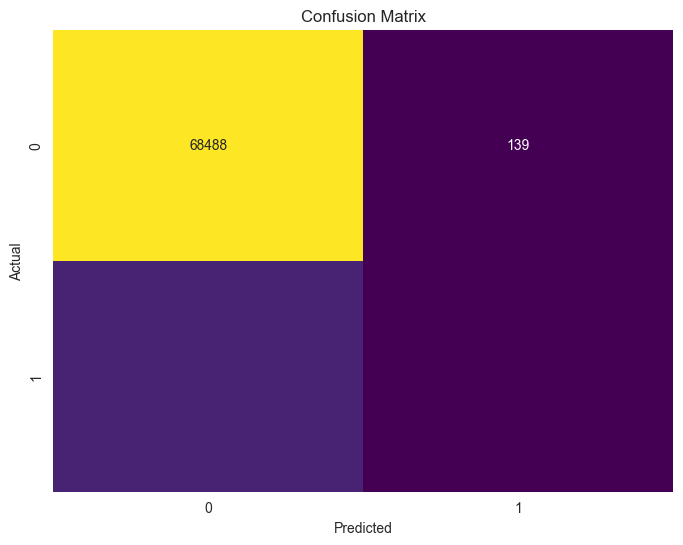

In [55]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'viridis', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

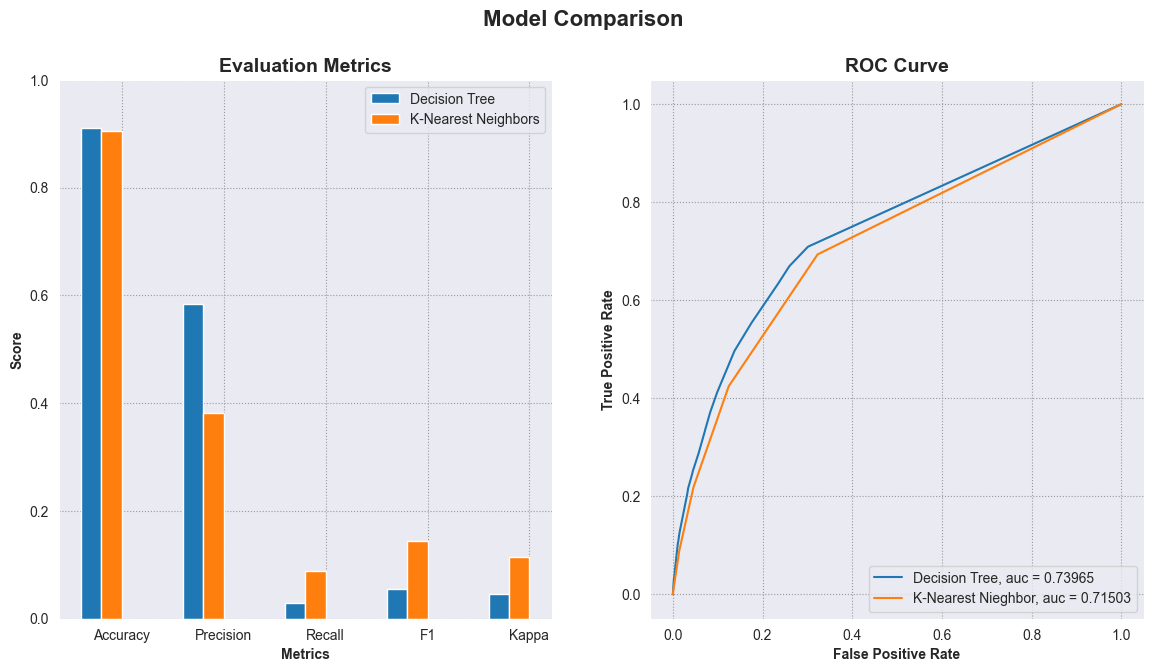

In [59]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['accuracy'], clf_eval['precision'], clf_eval['recall'], clf_eval['f1_score'], clf_eval['kappa']]
knn_score = [knn_eval['accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1_score'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()